<a href="https://colab.research.google.com/github/zShadil/GIT-Assignment/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from keras.datasets import mnist # import dataset from here

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPool2D, Input

# plotting NN
from keras.utils import plot_model
from IPython.display import Image

# Dataset

In [ ]:
# fetch data from mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4


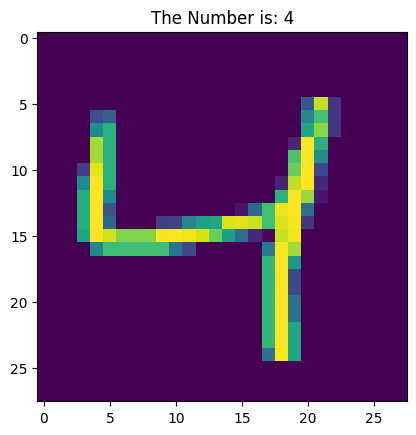

In [ ]:
i = 2

plt.imshow(x_train[i])                      # plots the image
plt.title(f'The Number is: {y_train[i]}')   # label as title
print(y_train[i])

In [ ]:
# image as dataframe
image_info = pd.DataFrame(x_train[i])
# display the values in the dataframe as a single image
print(image_info.to_string())

    0   1   2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21  22  23  24  25  26  27
0    0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
1    0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
2    0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
3    0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
4    0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
5    0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   67  232  39   0   0   0   0   0
6    0   0   0    0   62   81    0    0    0    0    0    0   

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# DL Modeling

In [ ]:
x_train[i].shape

(28, 28)

In [ ]:
# defining the Deep Learning or neural network model
cnn_model = Sequential()
# add layers to the model
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# loss function, type of optimizer and evaluation metric
# to be observed while training
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# training the neural network
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
# epochs decide the number of iterations this
# feed forward - back propagation loop has to run

# we can use the history to see the change in loss function
# we can use the history to see the change in loss function and evaluate the model in different epoch

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7768 - loss: 1.3625 - val_accuracy: 0.9776 - val_loss: 0.0785
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9616 - loss: 0.1302 - val_accuracy: 0.9817 - val_loss: 0.0604
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9732 - loss: 0.0913 - val_accuracy: 0.9858 - val_loss: 0.0532
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9786 - loss: 0.0753 - val_accuracy: 0.9870 - val_loss: 0.0425
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9796 - loss: 0.0682 - val_accuracy: 0.9825 - val_loss: 0.0604
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9810 - loss: 0.0613 - val_accuracy: 0.9853 - val_loss: 0.0578
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9844 - loss: 0.0488 - val_accuracy: 0.9849 - val_loss: 0.0554
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9863 - loss: 0.0451 

# Model summary

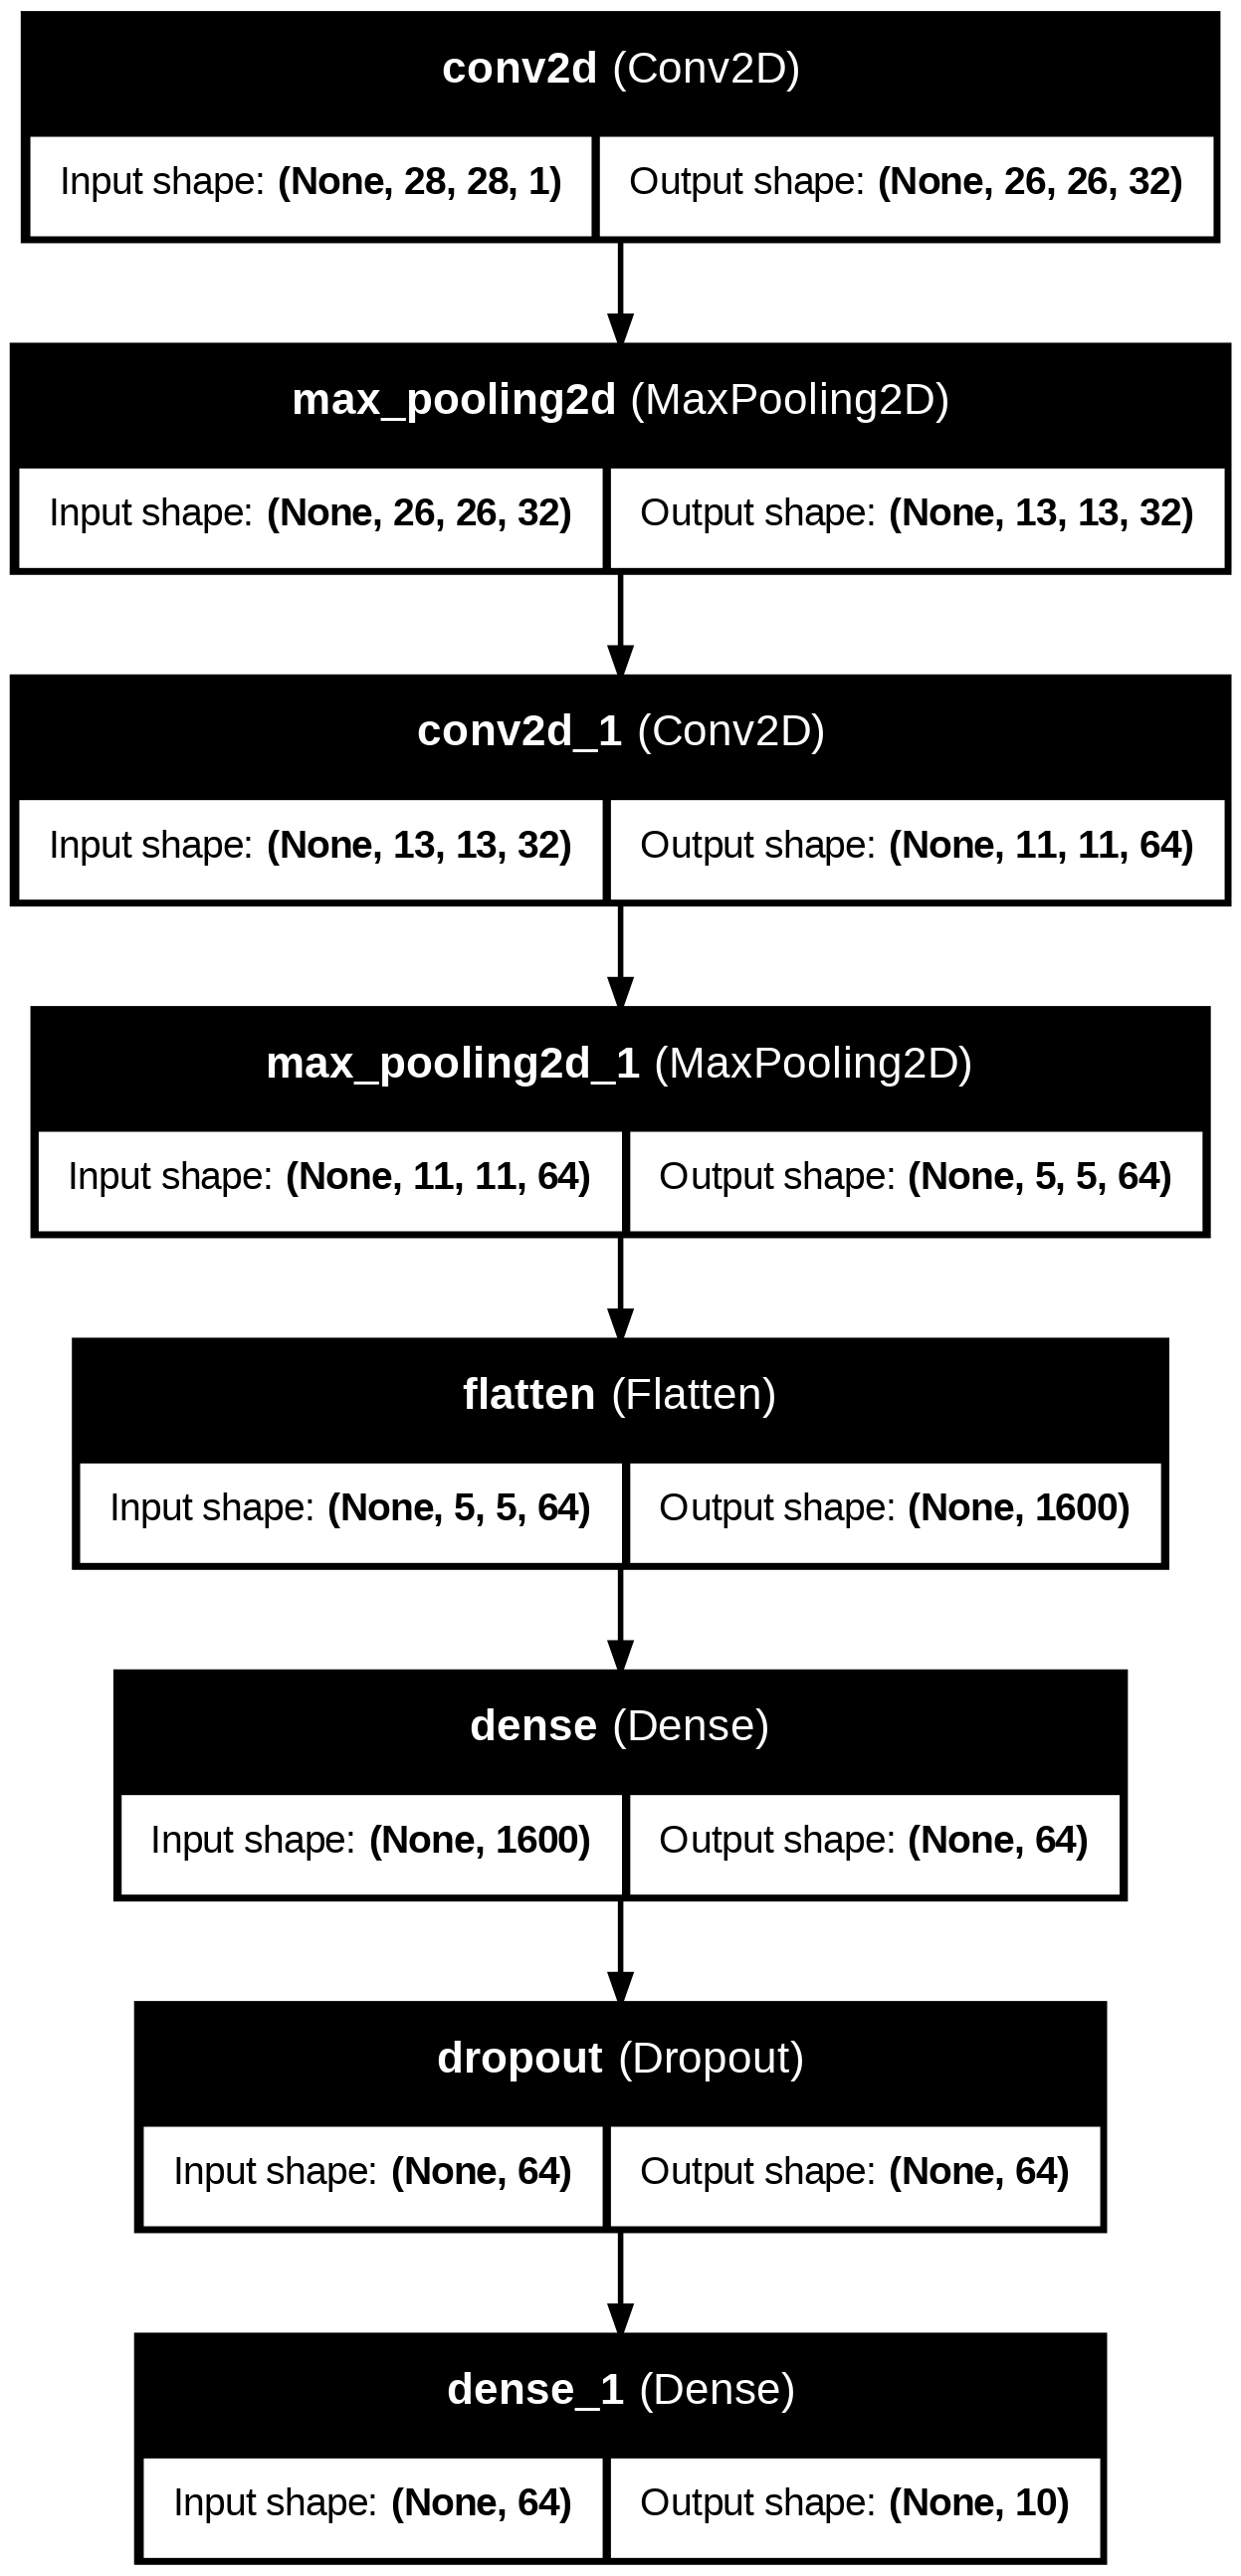

In [ ]:
# summary of the model with details of each layer
plot_model(cnn_model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

# display the image
Image(filename='model_summary.png')
# this image will help in understanding matrix size changes.
# after each layer.